In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This plot style module is provided by Ting-Wen Lan
def my_plot_style():
    params = {'legend.fontsize': 15,
    'axes.labelsize': 15,
    'axes.titlesize':15,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'xtick.major.size':5,
    'xtick.minor.size':2.5,
    'ytick.major.size':5,
    'ytick.minor.size':2.5,
    'figure.facecolor':'w',
    #'lines.linewidth' : 1.5,
    'xtick.major.width':1.5,
    'ytick.major.width':1.5,
    'xtick.minor.width':1.5,
    'ytick.minor.width':1.5,
    'axes.linewidth':1.5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'ytick.labelleft':True,
    'text.usetex' : False,
    'font.family': 'sans-serif'}
    plt.rcParams.update(params)
my_plot_style()

In [81]:
class star:
    def __init__(self,filename):
        data = np.loadtxt(filename)
        self.age     = data[:,1]
        self.log_lum = data[:,3]
        self.log_r   = data[:,4]
        self.log_sT  = data[:,5]
        self.lum_pp  = data[:,18]
        self.lum_cno = data[:,19]
        self.lum_3a  = data[:,20]
        self.lum_nu  = data[:,22]

class structure:
    def __init__(self,bath,n):
        data = np.loadtxt(bath+'/structure_{:05d}.txt'.format(n))
        self.rad = data[:,1]
        self.lum = data[:,2]
        self.temp = data[:,5]
        self.e_nuc = data[:,19]
        self.e_pp = data[:,20]
        self.e_cno = data[:,21]

In [95]:
tsun = star('summary_tsun.txt')     # Initial Mass = 1.0, Z = 0.02
msun = star('summary_massive.txt')  # Initial Mass = 25 , Z = 0.02
lsun = star('summary_lowm.txt')     # Initial Mass = 25 , Z = 0.0001

### 圖一
根據第十周投影片p47，恆星在Luminosity-Age圖中第一個轉折點以前位於主序帶上，第一個local maximum之後為氦核融合的階段。

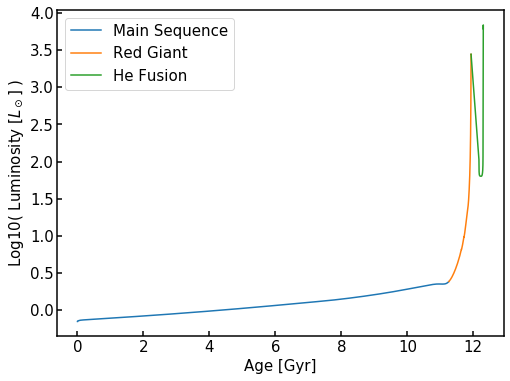

In [110]:
n_rg = 220
n_he = 500

plt.figure(figsize=(8,6))
plt.plot(tsun.age[:n_rg]/1e9,tsun.log_lum[:n_rg],label='Main Sequence')
plt.plot(tsun.age[n_rg:n_he]/1e9,tsun.log_lum[n_rg:n_he],label='Red Giant')
plt.plot(tsun.age[n_he:]/1e9,tsun.log_lum[n_he:],label='He Fusion')
plt.xlabel('Age [Gyr]')
plt.ylabel(r'Log10( Luminosity [$L_\odot$] )')
plt.legend()
plt.show()

### 圖二

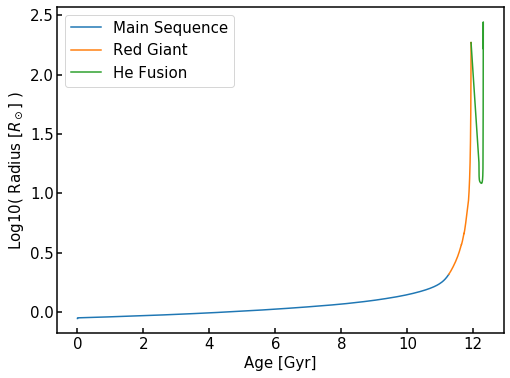

In [111]:
plt.figure(figsize=(8,6))
plt.plot(tsun.age[:n_rg]/1e9,tsun.log_r[:n_rg],label='Main Sequence')
plt.plot(tsun.age[n_rg:n_he]/1e9,tsun.log_r[n_rg:n_he],label='Red Giant')
plt.plot(tsun.age[n_he:]/1e9,tsun.log_r[n_he:],label='He Fusion')
plt.xlabel('Age [Gyr]')
plt.ylabel(r'Log10( Radius [$R_\odot$] )')
plt.legend()
plt.show()

### 圖三

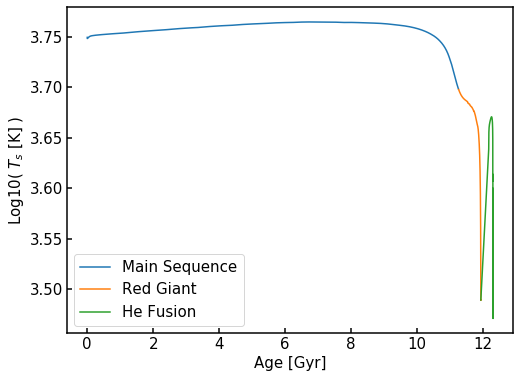

In [112]:
plt.figure(figsize=(8,6))
plt.plot(tsun.age[:n_rg]/1e9,tsun.log_sT[:n_rg],label='Main Sequence')
plt.plot(tsun.age[n_rg:n_he]/1e9,tsun.log_sT[n_rg:n_he],label='Red Giant')
plt.plot(tsun.age[n_he:]/1e9,tsun.log_sT[n_he:],label='He Fusion')
plt.xlabel('Age [Gyr]')
plt.ylabel(r'Log10( $T_s$ [K] )')
plt.legend()
plt.show()

### 圖四

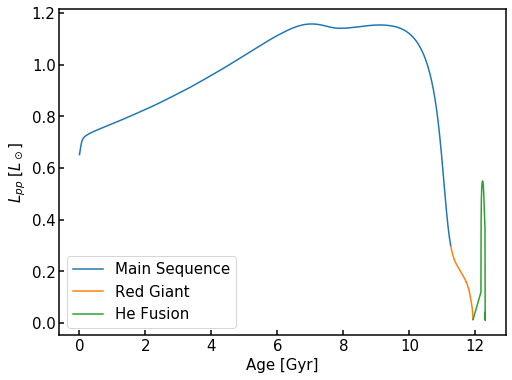

In [114]:
plt.figure(figsize=(8,6))
plt.plot(tsun.age[:n_rg]/1e9,tsun.lum_pp[:n_rg],label='Main Sequence')
plt.plot(tsun.age[n_rg:n_he]/1e9,tsun.lum_pp[n_rg:n_he],label='Red Giant')
plt.plot(tsun.age[n_he:]/1e9,tsun.lum_pp[n_he:],label='He Fusion')
plt.xlabel('Age [Gyr]')
plt.ylabel(r'$L_{pp}$ [$L_\odot$]')
plt.legend()
plt.show()

### 圖五

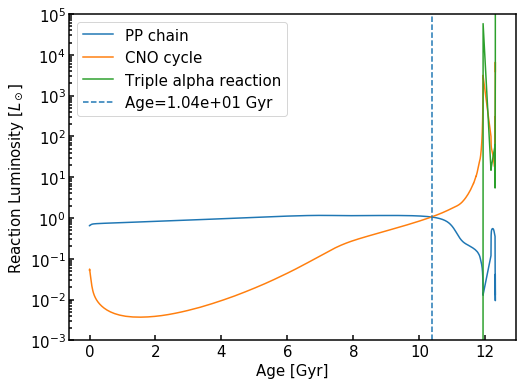

In [118]:
plt.figure(figsize=(8,6))
plt.plot(tsun.age/1e9,tsun.lum_pp,label='PP chain')
plt.plot(tsun.age/1e9,tsun.lum_cno,label='CNO cycle')
plt.semilogy(tsun.age/1e9,tsun.lum_3a,label='Triple alpha reaction')
plt.axvline(tsun.age[np.argmax(tsun.lum_cno>tsun.lum_pp)]/1e9,ls='--',label=f'Age={tsun.age[np.argmax(tsun.lum_cno>tsun.lum_pp)]/1e9:.2e} Gyr')
plt.xlabel('Age [Gyr]')
plt.ylabel(r'Reaction Luminosity [$L_\odot$]')
plt.legend()
plt.ylim([1e-3,1e5])
plt.show()

## g.

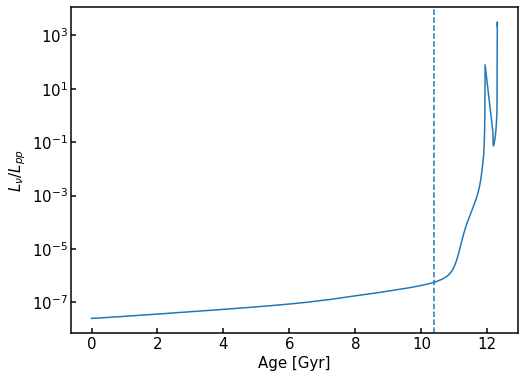

In [122]:
plt.figure(figsize=(8,6))
plt.semilogy(tsun.age/1e9,tsun.lum_nu/tsun.lum_pp,label='PP chain')
plt.axvline(tsun.age[np.argmax(tsun.lum_cno>tsun.lum_pp)]/1e9,ls='--',label=f'Age={tsun.age[np.argmax(tsun.lum_cno>tsun.lum_pp)]/1e9:.2e} Gyr')
plt.xlabel('Age [Gyr]')
plt.ylabel(r'$L_\nu$/$L_{pp}$')
plt.show()

### 圖六

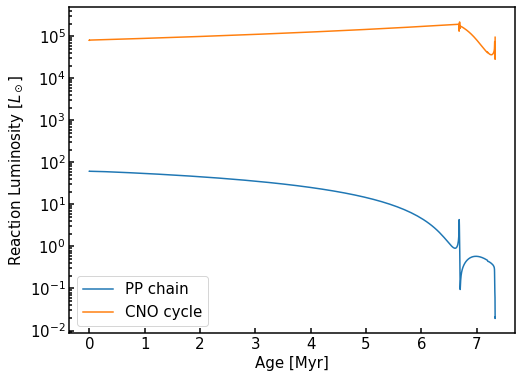

In [145]:
plt.figure(figsize=(8,6))
plt.semilogy(msun.age/1e6,msun.lum_pp,label='PP chain')
plt.semilogy(msun.age/1e6,msun.lum_cno,label='CNO cycle')
plt.xlabel('Age [Myr]')
plt.ylabel(r'Reaction Luminosity [$L_\odot$]')
plt.legend()
plt.show()

## i.

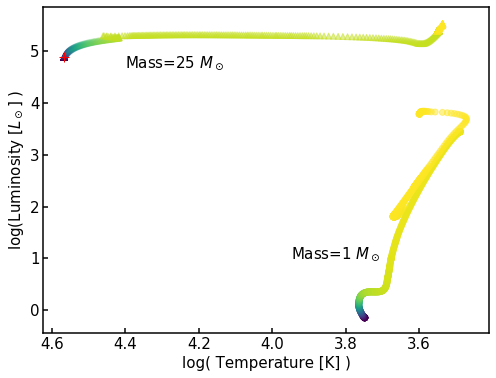

In [135]:
plt.figure(figsize=(8,6))
plt.scatter(tsun.log_sT,tsun.log_lum,c=tsun.age,alpha=0.5)
plt.scatter(msun.log_sT,msun.log_lum,marker='^',c=msun.age,alpha=0.5)
plt.plot(msun.log_sT[0],msun.log_lum[0],marker='+',markersize=10,c='red')
plt.text(4.4,4.7,'Mass=25 $M_\odot$',size=15)
plt.text(3.95,1,'Mass=1 $M_\odot$',size=15)
plt.xlabel('log( Temperature [K] )')
plt.ylabel(r'log(Luminosity [$L_\odot$] )')
plt.gca().invert_xaxis()
#plt.colorbar()
plt.show()

### 圖七

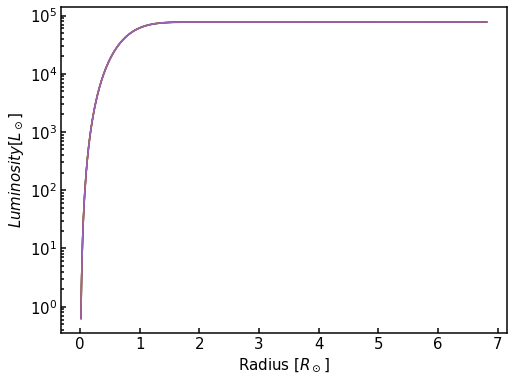

In [138]:
plt.figure(figsize=(8,6))

for i in range(5):
    st = structure('ezweb_19257',i)
    plt.semilogy(st.rad,st.lum)

plt.xlabel('Radius [$R_\odot$]')
plt.ylabel(r'$Luminosity [L_\odot]$')

plt.show()

### 圖八

C:\Users\Sandy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Sandy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\Sandy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Sandy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


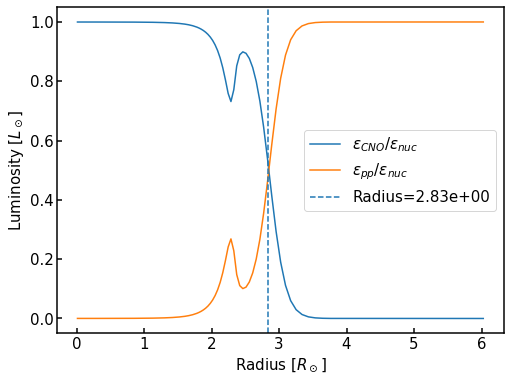

In [140]:
plt.figure(figsize=(8,6))

st = structure('ezweb_19257',0)
plt.plot(st.rad,st.e_cno/st.e_nuc,label=r'$\epsilon_{CNO}/\epsilon_{nuc}$')
plt.plot(st.rad,st.e_pp/st.e_nuc,label=r'$\epsilon_{pp}/\epsilon_{nuc}$')

perc = np.argmax(st.e_cno/st.e_nuc>0.5)
plt.axvline(st.rad[perc],ls='--',label=f'Radius={st.rad[perc]:.2e}')
    
plt.xlabel('Radius [$R_\odot$]')
plt.ylabel(r'Luminosity [$L_\odot$]')
#plt.ylim([1e-5,10])
plt.legend()
plt.show()

### 圖九

C:\Users\Sandy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Sandy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


Temperature at radius 0.42 is 1.42e+07


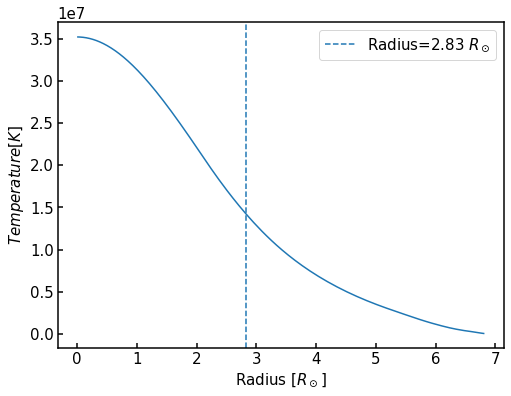

In [144]:
plt.figure(figsize=(8,6))

st = structure('ezweb_19257',0)
plt.plot(st.rad,st.temp)

perc = np.argmax(st.e_cno/st.e_nuc>0.5)
plt.axvline(st.rad[perc],ls='--',label=f'Radius={st.rad[perc]:.2f} $R_\odot$')

print(f'Temperature at radius {st.rad[perc]/10**msun.log_r[i]:.2f} is {st.temp[perc]:.2e}')

plt.xlabel('Radius [$R_\odot$]')
plt.ylabel(r'$Temperature [K]$')

plt.legend()
plt.show()

### 圖十

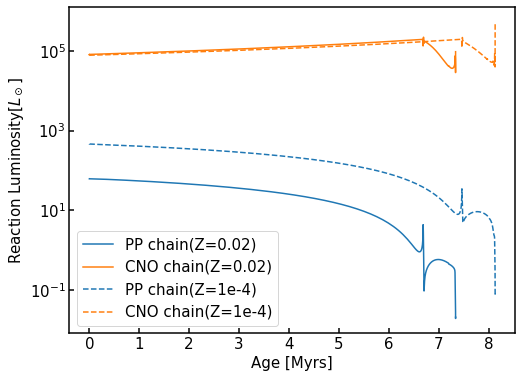

In [146]:
plt.figure(figsize=(8,6))
plt.semilogy(msun.age/1e6,msun.lum_pp,label='PP chain(Z=0.02)',c='tab:blue')
plt.semilogy(msun.age/1e6,msun.lum_cno,label='CNO chain(Z=0.02)',c='tab:orange')
plt.semilogy(lsun.age/1e6,lsun.lum_pp,label='PP chain(Z=1e-4)',ls='--',c='tab:blue')
plt.semilogy(lsun.age/1e6,lsun.lum_cno,label='CNO chain(Z=1e-4)',ls='--',c='tab:orange')
plt.xlabel('Age [Myrs]')
plt.ylabel(r'Reaction Luminosity[$L_\odot$]')
plt.legend()
plt.show()